# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 
              'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 
              'id':str, 'sqft_lot':int, 'view':int}

In [2]:
tmp = np.array([1., 2., 3.])
tmp_cubed = tmp**3
print tmp
print tmp_cubed

[ 1.  2.  3.]
[  1.   8.  27.]


In [3]:
ex_sframe = pd.DataFrame()
ex_sframe['power_1'] = tmp
print ex_sframe

   power_1
0        1
1        2
2        3


# Polynomial_dataframe function

In [4]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = poly_dataframe['power_1'].apply(lambda x: x**power)
    return poly_dataframe

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [5]:
print polynomial_dataframe(tmp, 3)

   power_1  power_2  power_3
0        1        1        1
1        2        4        8
2        3        9       27


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [6]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [7]:
sales = sales.sort_values(by = ['sqft_living','price'])

In [8]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000,0,0.00,290,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000,1,0.75,370,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000,1,0.75,380,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000,0,0.75,384,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000,0,1.00,390,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [9]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']
poly1_data.head()

,power_1,price
19452,290,142000
15381,370,276000
860,380,245000
18379,384,265000
4868,390,228000


In [10]:
model1 = LinearRegression()
model1.fit(poly1_data[['power_1']], poly1_data[['price']])        # (x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print model1.intercept_
print model1.coef_

[-43580.74309447]
[[ 280.6235679]]


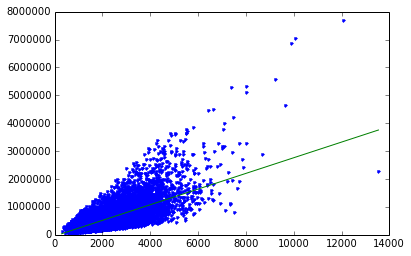

In [12]:
plt.plot(poly1_data[['power_1']],poly1_data[['price']],'.', 
         poly1_data[['power_1']], model1.predict(poly1_data[['power_1']]),'-')

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [13]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
my_features = poly2_data.columns # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = LinearRegression()
model2.fit(poly2_data[my_features], poly2_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print model2.intercept_
print model2.coef_

199222.279305
[  6.79940947e+01   3.85812609e-02]


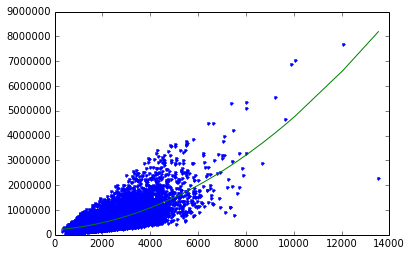

In [15]:
plt.plot(poly2_data[['power_1']], poly2_data[['price']],'.',
        poly2_data[['power_1']], model2.predict(poly2_data[my_features]), '-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [16]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
my_features3 = poly3_data.columns
poly3_data['price'] = sales['price']
model3 = LinearRegression()
model3.fit(poly3_data[my_features3], poly3_data[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

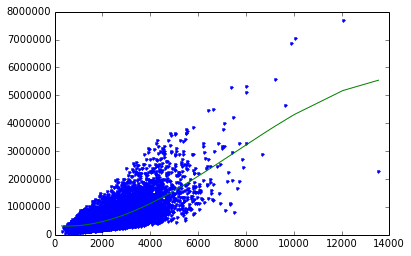

In [17]:
plt.plot(poly3_data[['power_1']], poly3_data[['price']], '.', 
        poly3_data[['power_1']], model3.predict(poly3_data[my_features3]), '-')

Now try a 15th degree polynomial:

In [18]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
my_features15 = poly15_data.columns
poly15_data['price'] = sales['price']
model15 = LinearRegression()
model15.fit(poly15_data[my_features15], poly15_data[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print model15.coef_

[[  4.56404164e-91  -6.23779529e-50  -1.29713680e-57   5.65542367e-61
    1.28682113e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
    1.47144115e-59   1.09771012e-55   7.43509038e-52   4.23015577e-48
    1.61618577e-44  -2.49283826e-48   9.59718336e-53]]


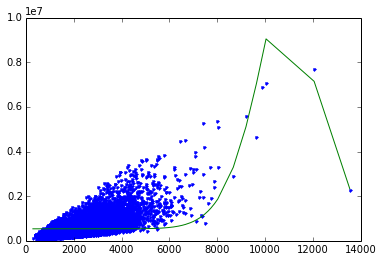

In [20]:
plt.plot(poly15_data[['power_1']], poly15_data[['price']], '.',
         poly15_data[['power_1']], model15.predict(poly15_data[my_features15]), '-')

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

In [21]:
set1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

In [22]:
def regr_model15(data, degree, plot = False):
    poly15_data = polynomial_dataframe(data['sqft_living'], 15)
    my_features15 = poly15_data.columns     # Column names
    poly15_data['price'] = data['price']   # Appending target column
    model15_regr = LinearRegression()
    model15_regr.fit(poly15_data[my_features15], poly15_data['price'])
    print pd.Series(model15_regr.coef_,index=my_features15)
    if plot:
        plt.plot(poly15_data['power_1'], poly15_data['price'], '.',
                poly15_data['power_1'], model15_regr.predict(poly15_data[my_features15]), '-')

power_1     1.765101e-05
power_2     4.454741e-02
power_3     4.136116e-06
power_4    -4.480687e-10
power_5    -2.268721e-14
power_6     1.116965e-16
power_7    -7.186595e-16
power_8     3.005265e-16
power_9    -1.731154e-16
power_10   -1.275788e-15
power_11    1.167231e-16
power_12    5.631658e-16
power_13    2.044808e-16
power_14   -3.172030e-16
power_15   -3.817914e-16
dtype: float64
None


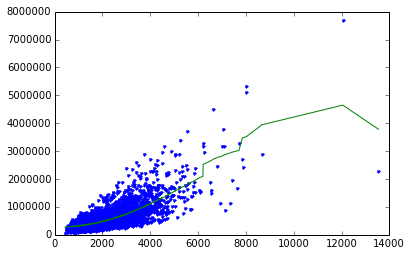

In [23]:
print regr_model15(set1, 15, plot = True)

power_1     3.008628e-05
power_2     6.133889e-02
power_3    -2.496237e-06
power_4     1.106713e-10
power_5    -1.776240e-14
power_6     7.902327e-16
power_7    -3.645011e-16
power_8    -3.027134e-16
power_9    -6.071065e-16
power_10    3.781335e-16
power_11    7.095160e-16
power_12    7.699416e-16
power_13    1.044036e-15
power_14   -4.610407e-16
power_15    1.346811e-15
dtype: float64
None


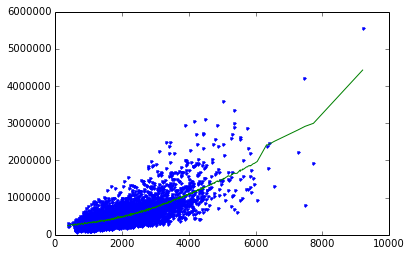

In [24]:
print regr_model15(set2, 15, plot = True)

power_1     3.062153e-05
power_2     6.775020e-02
power_3    -5.358450e-06
power_4     4.621331e-10
power_5    -1.311372e-14
power_6    -1.397926e-16
power_7    -3.498338e-16
power_8     5.723593e-16
power_9     4.422092e-16
power_10    5.281778e-16
power_11   -2.178714e-16
power_12    1.120926e-15
power_13    6.174047e-16
power_14    3.253656e-16
power_15   -2.570605e-16
dtype: float64
None


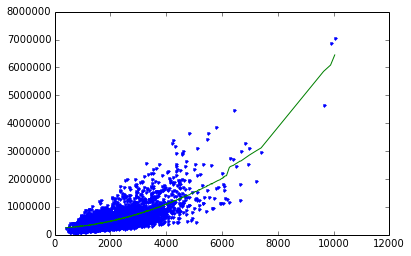

In [25]:
print regr_model15(set3, 15, plot = True)

power_1     2.919279e-05
power_2     5.469610e-02
power_3    -1.411142e-06
power_4     7.127169e-11
power_5     3.469606e-14
power_6    -1.227830e-15
power_7    -3.926092e-16
power_8     9.066285e-16
power_9    -4.949677e-16
power_10   -5.477234e-16
power_11    2.739278e-16
power_12    3.863357e-16
power_13    2.891813e-16
power_14   -1.039786e-15
power_15   -3.275862e-16
dtype: float64
None


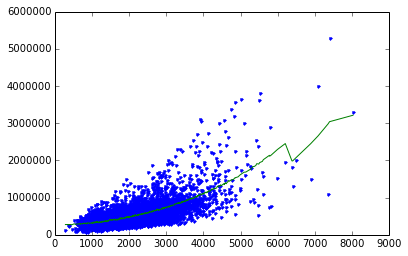

In [26]:
print regr_model15(set4, 15, plot = True)

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?** --No

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots** --No

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

In [27]:
test = pd.read_csv('wk3_kc_house_test_data.csv')
train = pd.read_csv('wk3_kc_house_train_data.csv')
valid = pd.read_csv('wk3_kc_house_valid_data.csv')

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [28]:
rss = []
min = (0, 1e+16)
for degree in xrange(1,16):
    polyi_data = polynomial_dataframe(train['sqft_living'], degree)     # Prepare dataset
    my_featuresi = polyi_data.columns     # Column names
    polyi_data['price'] = train['price']   # Appending target column
    
    modeli_regr = LinearRegression()
    modeli_regr.fit(polyi_data[my_featuresi], polyi_data['price'])     # Create model
    
    valid_poly_data = polynomial_dataframe(valid['sqft_living'], degree)  # Prepare validation dataset
    valid_poly_data['price'] = valid['price']                         
    pred_v = modeli_regr.predict(valid_poly_data[my_featuresi])       # Predictions
    
    validation_rss = np.sum((pred_v - valid_poly_data['price'])**2)     # Get RSS on validation dataset
    rss.append(validation_rss)
    
    if validation_rss < min[1]:
        min = (degree, validation_rss)
    
    polyi_test = polynomial_dataframe(test['sqft_living'], degree)      # Prepare test dataset
    polyi_test['price'] = test['price']
    test_rss = np.sum((test['price'] - modeli_regr.predict(polyi_test[my_featuresi]))**2)    # Get RSS on test
    
    print 'Degree- %d Validation Error - %g || Test - %g'%(degree, validation_rss, test_rss)

Degree- 1 Validation Error - 6.29098e+14 || Test - 1.42348e+14
Degree- 2 Validation Error - 6.23955e+14 || Test - 1.35542e+14
Degree- 3 Validation Error - 6.2582e+14 || Test - 1.35586e+14
Degree- 4 Validation Error - 6.29987e+14 || Test - 1.35383e+14
Degree- 5 Validation Error - 6.23373e+14 || Test - 1.36772e+14
Degree- 6 Validation Error - 6.23239e+14 || Test - 1.36766e+14
Degree- 7 Validation Error - 6.23177e+14 || Test - 1.36761e+14
Degree- 8 Validation Error - 6.23365e+14 || Test - 1.36783e+14
Degree- 9 Validation Error - 6.23355e+14 || Test - 1.36773e+14
Degree- 10 Validation Error - 6.2344e+14 || Test - 1.36765e+14
Degree- 11 Validation Error - 6.2357e+14 || Test - 1.36772e+14
Degree- 12 Validation Error - 6.23298e+14 || Test - 1.36742e+14
Degree- 13 Validation Error - 6.23267e+14 || Test - 1.36813e+14
Degree- 14 Validation Error - 6.23214e+14 || Test - 1.36986e+14
Degree- 15 Validation Error - 6.23348e+14 || Test - 1.37011e+14


In [29]:
print min

(7, 623177116282820.75)


Degree- 7 Validation Error - 623177116282820.750000 || Test - 136760931109133.765625

In [30]:
print "%g"%136760931109133.765625

1.36761e+14


# Though, the right answer for the quiz is degree 6. The difference must be due to difference in the method of splitting data